In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import config
import csv

from fastai import *
from fastai.text import *

In [2]:
bs=48

In [3]:
torch.cuda.set_device(0)

In [4]:
# load databunch
data_lm = load_data('.', 'DATA/lm_databunch', bs=bs)

In [5]:
learn_lm = language_model_learner(data_lm, pretrained=True, arch=AWD_LSTM, drop_mult=0.3)

In [6]:
vocab = data_lm.vocab

In [7]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


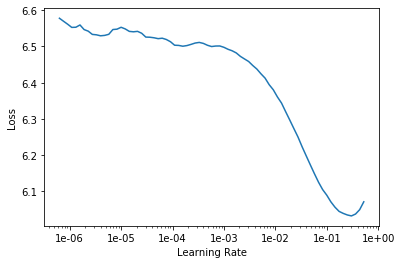

In [8]:
learn_lm.recorder.plot(skip_end=15)

In [9]:
lr = 5e-3
lr *= bs/48

In [10]:
learn_lm.to_fp16()

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (7006007 items)
x: LMTextList
xxbos xxmaj we 're all just making plans for xxmaj nigel .,xxbos xxmaj john mccain xxmaj on xxmaj refugees : ' xxmaj all xxmaj children xxmaj are xxmaj god 's xxmaj children ',xxbos xxmaj who reported the lady in the first place ?,xxbos n xxrep 5 o pe .,xxbos xxmaj xxunk ... are you paying attention ?
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1751503 items)
x: LMTextList
xxbos xxmaj trump looks a bit like xxmaj andrew xxmaj carnage .,xxbos xxmaj folks , the wall just got * * * xxup ten xxup feet xxup taller * * *,xxbos xxmaj this is an angel .,xxbos i 'm such a loser that i 'm more likely to get arrested without commiting a crime actually .,xxbos xxmaj how much xxmaj adderall did you take to accomplish this ?
y: LMLabelList
,,,,
Path: .;

Test: None, model=SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60000, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embeddin

In [11]:
learn_lm.fit_one_cycle(1, lr*10, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.630028,4.472093,0.281926,1:59:02


In [12]:
learn_lm.unfreeze()

In [13]:
learn_lm.fit_one_cycle(15, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.099596,4.021856,0.326653,2:14:02
1,4.094166,4.021291,0.326683,2:13:59
2,4.125146,4.052231,0.323648,2:14:04
3,4.110411,4.071065,0.321949,2:14:09
4,4.129794,4.056809,0.323065,2:13:57
5,4.114715,4.037853,0.324909,2:14:00
6,4.070493,4.013741,0.327338,2:13:54
7,4.046966,3.985001,0.330232,2:13:55
8,4.010633,3.952490,0.333421,2:13:57
9,3.980968,3.918189,0.336825,2:13:57


In [14]:
learn_lm.save('fine_tuned')
learn_lm.save_encoder('fine_tuned_enc')